In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

Local_path='/home/jmdeloui/STL_dev/STL_main'
sys.path.append(Local_path)

from STL_2D_Kernel_Torch import STL_2D_Kernel_Torch as DataClass
from ST_Operator import ST_Operator as SO
from Synthesis import optimize_scattering_LBFGS

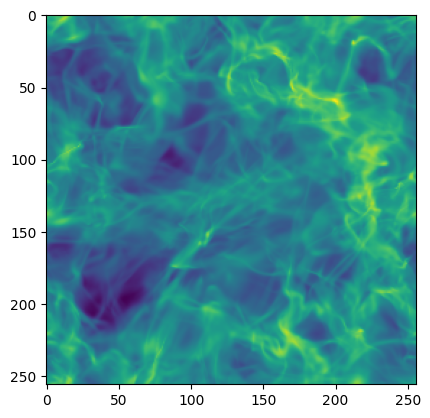

In [14]:
nside=128

im=np.load(Local_path+'/Certif_2D_Kernel_Torch/Turb_6.npy')[10]
data=DataClass(im)
plt.imshow(im)

# test wavelet computation

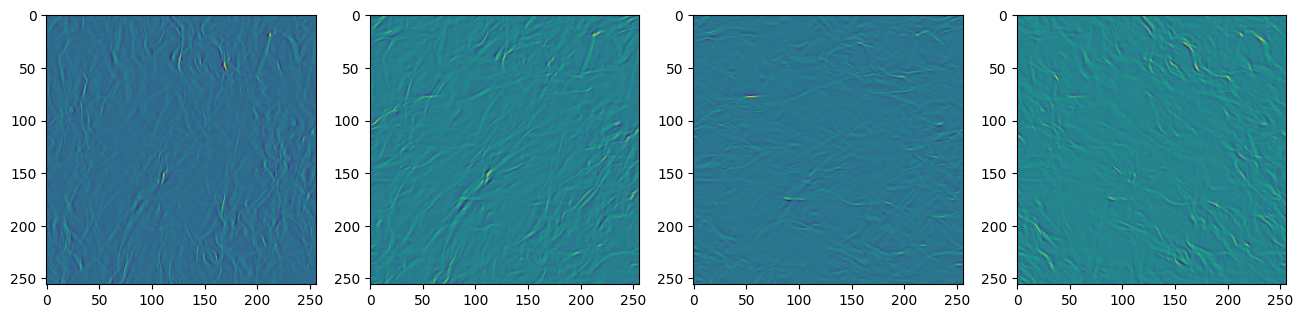

In [15]:
w_op=data.get_wavelet_op()

w_data = w_op.apply(data,0).array

plt.figure(figsize=(16,6))
for k in range(4):
    plt.subplot(1,4,1+k)
    plt.imshow(w_data[k].cpu().numpy().real)

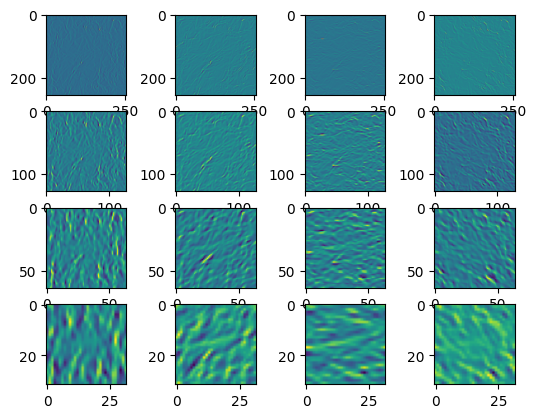

In [16]:
l_data=DataClass(im)
for j in range(4):
    w_data = w_op.apply(l_data,j).array
    for k in range(4):
        plt.subplot(4,4,1+k+4*j)
        plt.imshow(w_data[k].cpu().numpy().real)
    
    #l_data=w_op.apply_smooth(l_data,copy=True)
    l_data=l_data.downsample(j+1)

In [17]:
from ST_Operator import ST_Operator as STO

l_data=DataClass(im)

st_op=STO(l_data)

st_data = st_op.apply(l_data)

/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


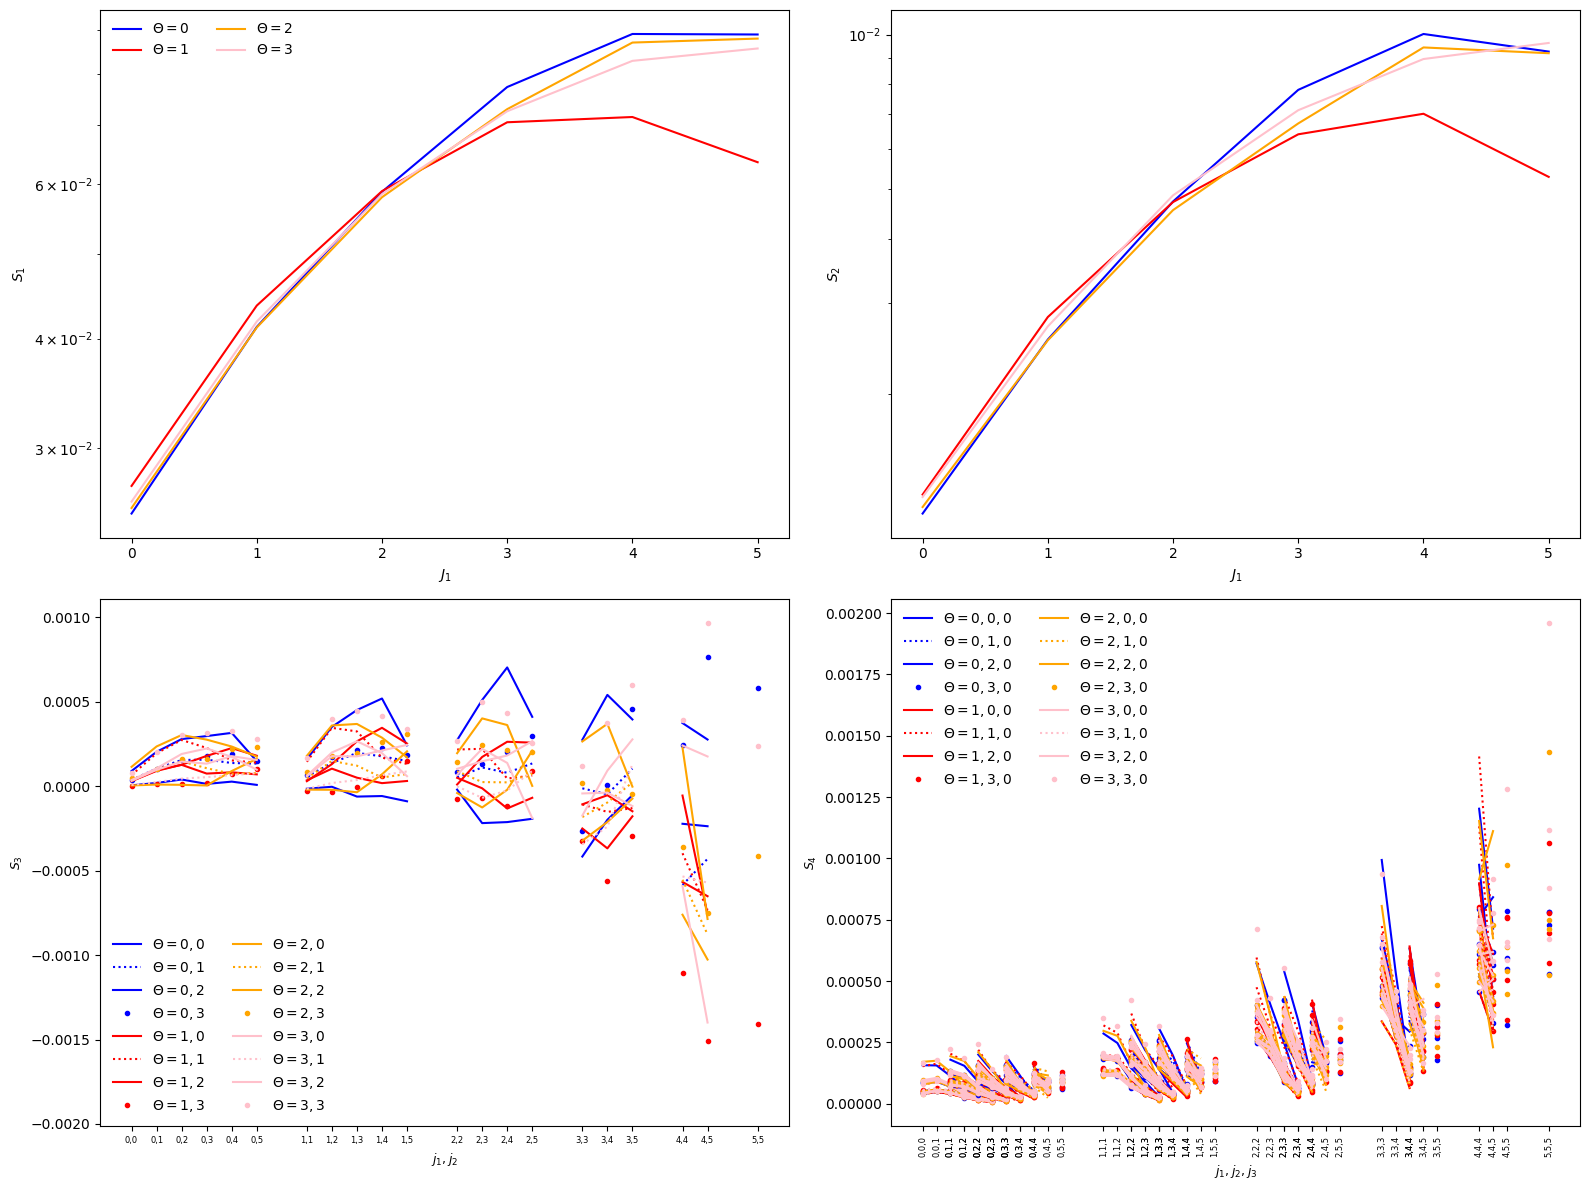

In [18]:
st_data.plot_coeff()

# do synthesis

In [19]:
st_data = st_op.apply(l_data)
st_data_norm = st_op.apply(l_data,norm='store_ref')

/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


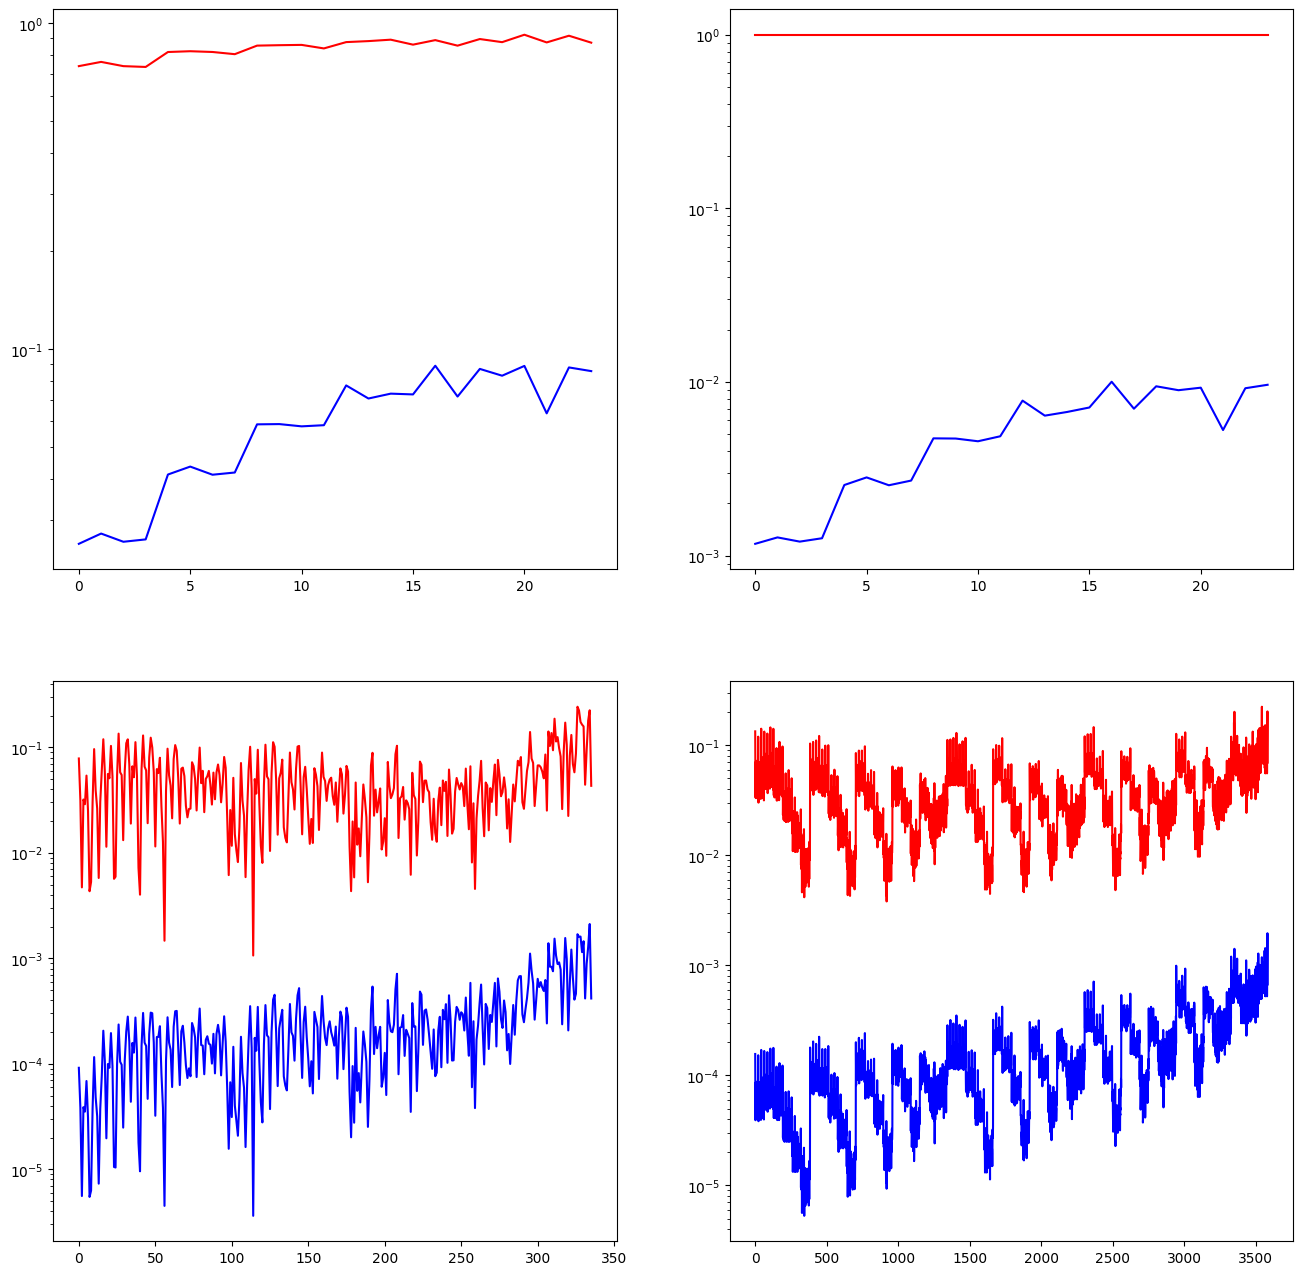

In [20]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.plot(st_data.S1.cpu().numpy().flatten(),color='b')
plt.plot(st_data_norm.S1.cpu().numpy().flatten(),color='r')
plt.yscale('log')
plt.subplot(2,2,2)
plt.plot(st_data.S2.cpu().numpy().flatten(),color='b')
plt.plot(st_data_norm.S2.cpu().numpy().flatten(),color='r')
plt.yscale('log')
def r_nan(x):
    return x[np.isfinite(x)]
plt.subplot(2,2,3)
plt.plot(r_nan(st_data.S3.abs().cpu().numpy().flatten()),color='b')
plt.plot(r_nan(st_data_norm.S3.abs().cpu().numpy().flatten()),color='r')
plt.yscale('log')
plt.subplot(2,2,4)
plt.plot(r_nan(st_data.S4.cpu().numpy().flatten()),color='b')
plt.plot(r_nan(st_data_norm.S4.cpu().numpy().flatten()),color='r')
plt.yscale('log')

# do synthesis

In [21]:
data = DataClass(im)
w_op = data.get_wavelet_op()

#Build the smooth version
target = w_op.apply_smooth(data).array.cpu().numpy()


Text(0.5, 1.0, 'Target')

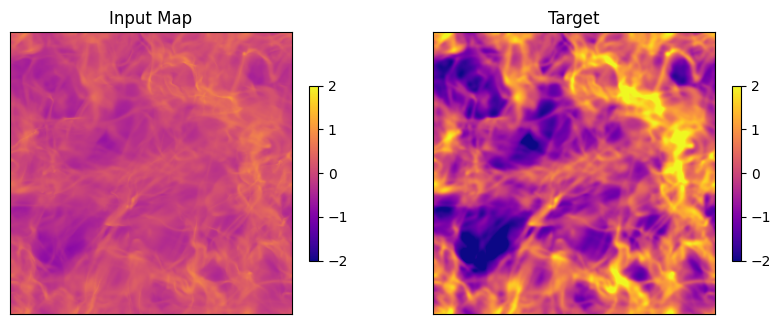

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(im-np.mean(im),cmap='plasma',vmin=-2,vmax=2)
plt.colorbar(shrink=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Input Map')
plt.subplot(2,2,2)
plt.imshow(target-np.mean(target),cmap='plasma',vmin=-2,vmax=2)
plt.colorbar(shrink=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Target')

In [23]:
u,histo = optimize_scattering_LBFGS(
        target,
        DataClass,
        SO,
        max_iter=300,
        lr=1.0,
        history_size=50,
        verbose=True,
        print_iter=30,
    )

[LBFGS] inner iter 30, loss = 9.408639e-01
[LBFGS] inner iter 60, loss = 1.703371e-01
[LBFGS] inner iter 90, loss = 9.426685e-02
[LBFGS] inner iter 120, loss = 7.026288e-02
[LBFGS] inner iter 150, loss = 5.743624e-02
[LBFGS] inner iter 180, loss = 4.518490e-02
[LBFGS] inner iter 210, loss = 3.515912e-02
[LBFGS] inner iter 240, loss = 3.064470e-02
[LBFGS] inner iter 270, loss = 2.689463e-02
[LBFGS] inner iter 300, loss = 2.372212e-02


Text(0.5, 1.0, 'Target')

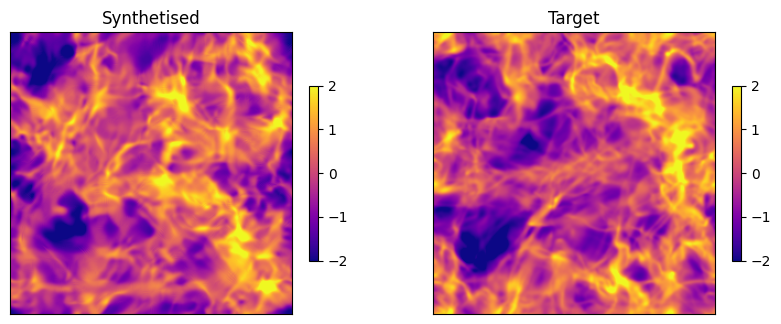

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(u.cpu().numpy(),cmap='plasma',vmin=-2,vmax=2)
plt.colorbar(shrink=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Synthetised')
plt.subplot(2,2,2)
plt.imshow(target-np.mean(target),cmap='plasma',vmin=-2,vmax=2)
plt.colorbar(shrink=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Target')